## INTRODUCTION

## Retail Anlysis

* Following are the features of analysis:
* Order ID: Order identification number for each product
* Product: Product name
* Quantity Ordered: Amount of items
* Price Each: Price of each product per item in dollars
* Order Date: Date of purchase
* Purchase Address: Address of purchase order

* In this dataset we have 6 coulumns.in that 4 are numeric and 2 are categorical.Order id is nothing but the order identification of each product.order id different for every product.the coulumn product gives name of tne product.the Quantity ordered gives information amount of item ordred by the customer.order date gives information about the date of purchased the product.purchase address gives information of adress of purchased the order. 

In [96]:
# Importing the all Required libraries:
import os
# Data Manipulation
import numpy as np 
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import Datetime for Date Analysis.
import datetime
# import missingno for dealing with missing values
import missingno as msno

* Here i Imported all required libraries,Those are needs for our data manipulation and data vizulization.

In [97]:
# Importing The All Dataset
data = pd.read_excel("C:/Users/DELL/Downloads/all_data_copy.xlsx")

* To Explore Data firstly we have to read data.to import data i used the pd.read function

## Basic Exploration

In [98]:
# To See First Five rows of Dataset
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


* Here i used the head() function i want to see first five observations of the Dataset.Because i want to Understand how Data is distributed at the Starting of Table.

In [99]:
# To See Last Five rows of Dataset
data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
373699,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


* Here i used the tail() function i want to see Last five observations of the Dataset.Because i want to Understand how Data is distributed at the Ending of Table.

In [100]:
# To see Shape of Dataset
data.shape

(373700, 6)

* Here i used df.shape function and it gives me a tuple i.e. (no.of row, no. of column).using this function i can easily see how many rows and columns in given dataset.and in our Dataset there is 373700 obsevations and 6 coulumns.

In [101]:
# Columns present in the dataset
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [102]:
# To see unique value in each column
data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              18
Order Date          142396
Purchase Address    140788
dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


* Here i can clearly see python reads all Data types as object but from given feaures Quantity ordered,Price each,order id and order date  should be Numerical.

In [104]:
data = data.drop(['Order ID'], axis = 1)

* Here i used the drop function because i want delete order id column.Because order id is different for every product.

In [105]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'],errors='coerce')
data['Price Each']=pd.to_numeric(data['Price Each'],errors='coerce')

In [106]:
data['Order Date']=pd.to_datetime(data['Order Date'],errors='coerce')

In [107]:
data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


* Here i converted Quantity Ordered,Price Each,Order Date into numeric.

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           372610 non-null  object        
 1   Quantity Ordered  371900 non-null  float64       
 2   Price Each        371900 non-null  float64       
 3   Order Date        371900 non-null  datetime64[ns]
 4   Purchase Address  372610 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 14.3+ MB


In [109]:
data = data.rename(columns = {'Quantity Ordered':'Quantity_Ordered','Price Each':'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'})
data

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
373695,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


* Here i used the .rename function to chnage the column name because the colums 'Quantity orderd', 'price each','order date' and 'purchase address'having space between two words.its can create some error in our visulization.to avoid it i just remove the space between words.

### Analyzing the amount of missing data

In [110]:
# Nulity Dataframe
data_missing = data.isnull()
data_missing

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
373695,False,False,False,False,False
373696,False,False,False,False,False
373697,False,False,False,False,False
373698,False,False,False,False,False


* Here i used the isna function to check there is any missing value or not.True means there is null Value And False means there is no null Values.

In [111]:
# Toatal mising Values
A = data_missing.sum()
A

Product             1090
Quantity_Ordered    1800
Price_Each          1800
Order_Date          1800
Purchase_Address    1090
dtype: int64

In [112]:
data_missing.mean() * 100

Product             0.291678
Quantity_Ordered    0.481670
Price_Each          0.481670
Order_Date          0.481670
Purchase_Address    0.291678
dtype: float64

<AxesSubplot:>

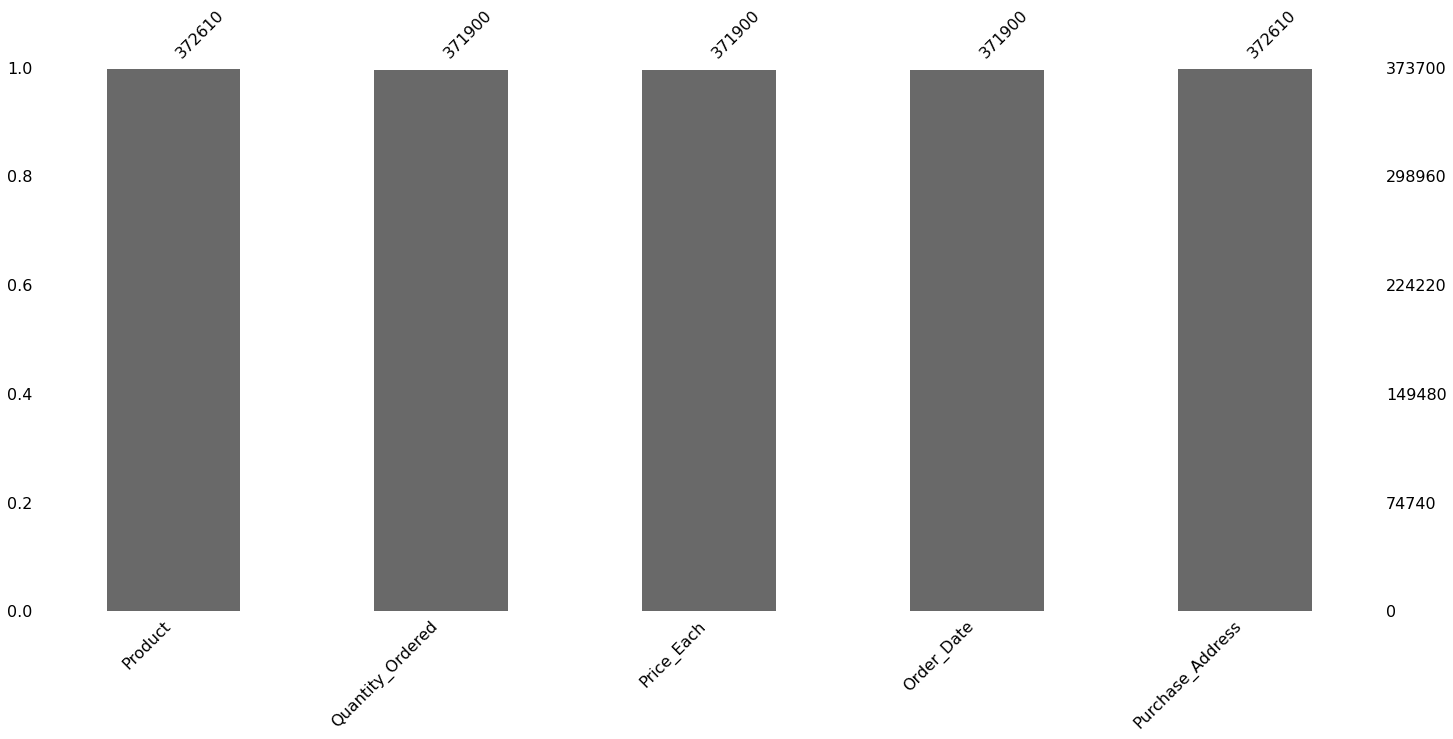

In [113]:
msno.bar(data)

* Here  i can easily see 0.48 % highest missing data its very less amount so i decide to remove it.

<AxesSubplot:>

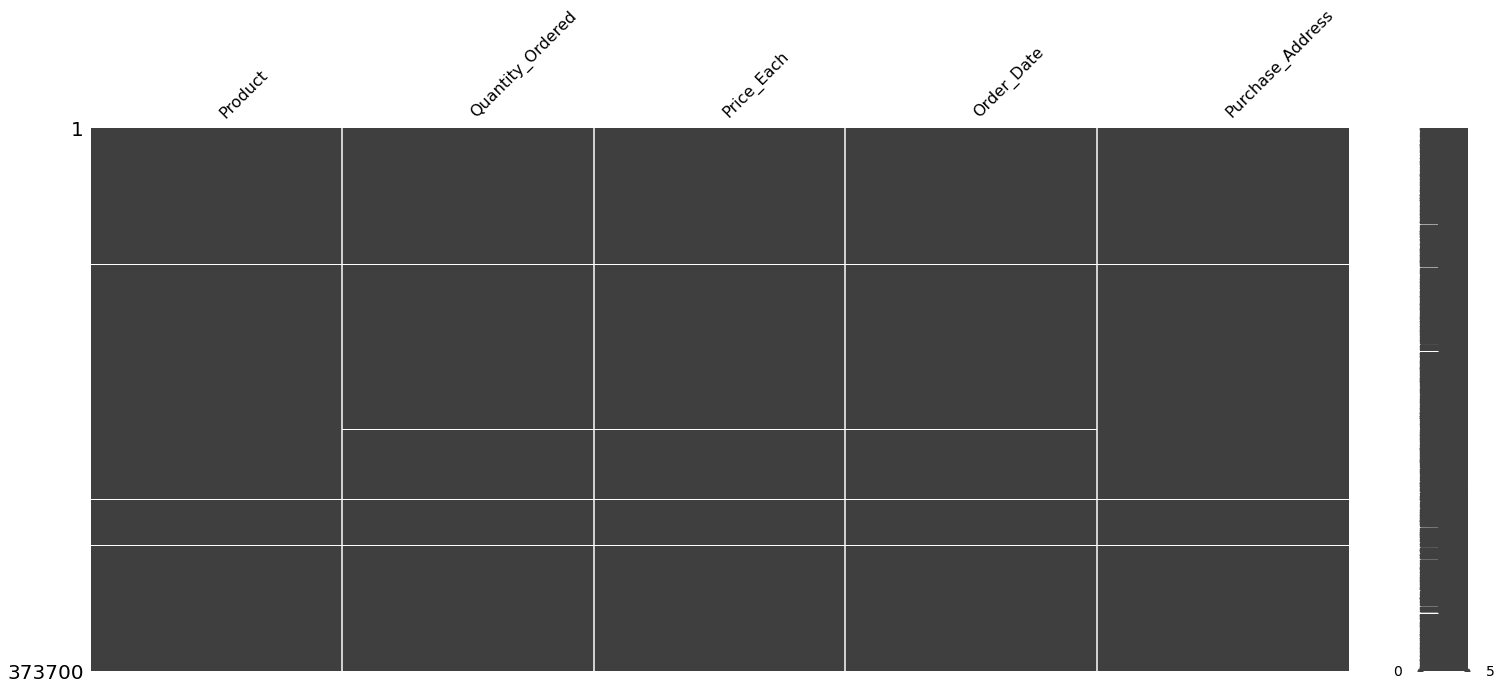

In [114]:
# Creating matrix plot to see the pattern in missing values
msno.matrix(data)

In [115]:
data.Product.unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [116]:
data.Price_Each.unique()

array([ 700.  ,   14.95,   11.99,  149.99,    2.99,  389.99,   11.95,
         99.99,  150.  , 1700.  ,  300.  ,  400.  ,    3.84,  600.  ,
        109.99,  379.99,  999.99,     nan])

In [117]:
data.Quantity_Ordered.unique()

array([ 1.,  2.,  3.,  5.,  4., nan,  7.,  6.,  9.,  8.])

In [118]:
data.Order_Date.unique()

array(['2019-01-22T21:25:00.000000000', '2019-01-28T14:15:00.000000000',
       '2019-01-17T13:33:00.000000000', ...,
       '2019-12-01T12:01:00.000000000', '2019-12-09T06:43:00.000000000',
       '2019-12-03T10:39:00.000000000'], dtype='datetime64[ns]')

In [119]:
data.Purchase_Address.unique()

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

In [120]:
data1 = data.dropna() 

* Here i used the dropna function to remove missing values.

In [121]:
data1_missing = data1.isnull()

In [122]:
data1_missing.sum()

Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

* Here i just check i removed misssing values successfully or not.

In [123]:
data1['month'] = pd.DatetimeIndex(data1['Order_Date']).month

C:\Users\DELL\AppData\Local\Temp/ipykernel_13196/594503239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month'] = pd.DatetimeIndex(data1['Order_Date']).month


* using above code i add new column month for my Exploratory Data Analysis using month only.

In [125]:
data1['city'] = [x.split(',')[1] for x in data1['Purchase_Address'].values]

C:\Users\DELL\AppData\Local\Temp/ipykernel_13196/3413348914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['city'] = [x.split(',')[1] for x in data1['Purchase_Address'].values]


* using above code i got City column from Purchase Address column for my Exploratory Data Analysis using month only.

In [158]:
data1

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,city
0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin
...,...,...,...,...,...,...,...
373695,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
373696,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
373697,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco
373698,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco


* Here My New Dataset with coulmn city and MONth

In [159]:
data1.head()

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,city
0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin


In [160]:
data1.tail()

,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,city
373695,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
373696,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
373697,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco
373698,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco
373699,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9,San Francisco


In [161]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 373699
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           371900 non-null  object        
 1   Quantity_Ordered  371900 non-null  float64       
 2   Price_Each        371900 non-null  float64       
 3   Order_Date        371900 non-null  datetime64[ns]
 4   Purchase_Address  371900 non-null  object        
 5   month             371900 non-null  int64         
 6   city              371900 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.8+ MB


* here i used the head, tail, info function to see how distributed new dataset

In [162]:
data.describe()

,Quantity_Ordered,Price_Each
count,371900.000000,371900.000000
mean,1.124383,184.399735
std,0.442792,332.730883
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


* Here i used The Describe Fuction to see five point summery of numeric columns. i.e. max, min, 25th percentile,75 percentile, 50 percentile is Median.

## Univariate Analysis

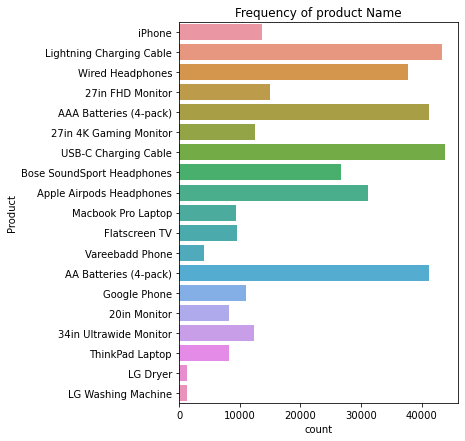

In [154]:
plt.figure(figsize = (5,7))
plt.title("Frequency of product Name")
sns.countplot(y = "Product", data = data1)
plt.show()

* Here i can Easily see the product 'USB-C C harging cable' is max sold product.

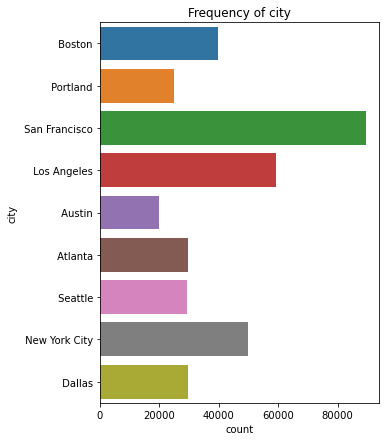

In [151]:
plt.figure(figsize = (5,7))
plt.title("Frequency of city")
sns.countplot(y = "city", data = data1)
plt.show()

* Here i can see the in the City San francisco max product purchased.
* The City San Francisco is best for open to branch.

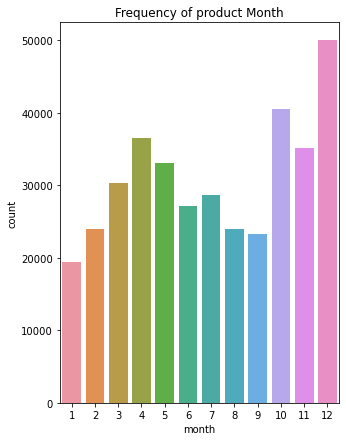

In [156]:
plt.figure(figsize = (5,7))
plt.title("Frequency of product Month")
sns.countplot(x = "month", data = data1)
plt.show()

* Here i can see the in the month december max product purchased.

<Figure size 720x360 with 0 Axes>

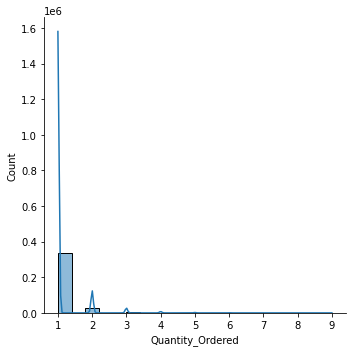

In [177]:
plt.figure(figsize=(10, 5))
sns.displot(data=data1, x="Quantity_Ordered", kde=True)

<Figure size 720x360 with 0 Axes>

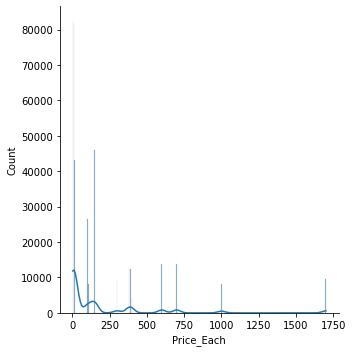

In [178]:
plt.figure(figsize=(10, 5))
sns.displot(data=data1, x="Price_Each", kde=True)

## Bivariate Analysis 

 San Francisco    89464
 Los Angeles      59210
 New York City    49752
 Boston           39868
 Atlanta          29762
 Dallas           29640
 Seattle          29464
 Portland         24930
 Austin           19810
Name: city, dtype: int64

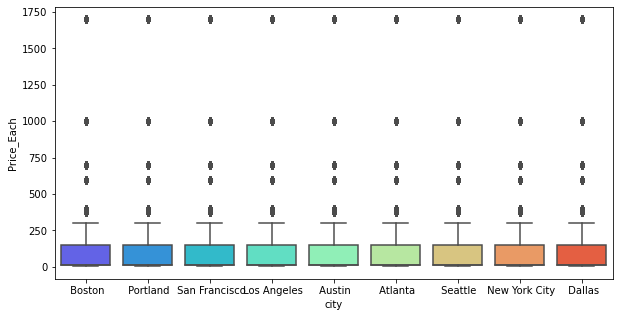

In [173]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data1["city"],y=data1["Price_Each"],palette='rainbow')
data1["city"].value_counts()

In [180]:
data.corr(method ='spearman')

,Quantity_Ordered,Price_Each
Quantity_Ordered,1.000000,-0.343767
Price_Each,-0.343767,1.000000


Text(0.5, 1.0, 'Spearman Correlation')

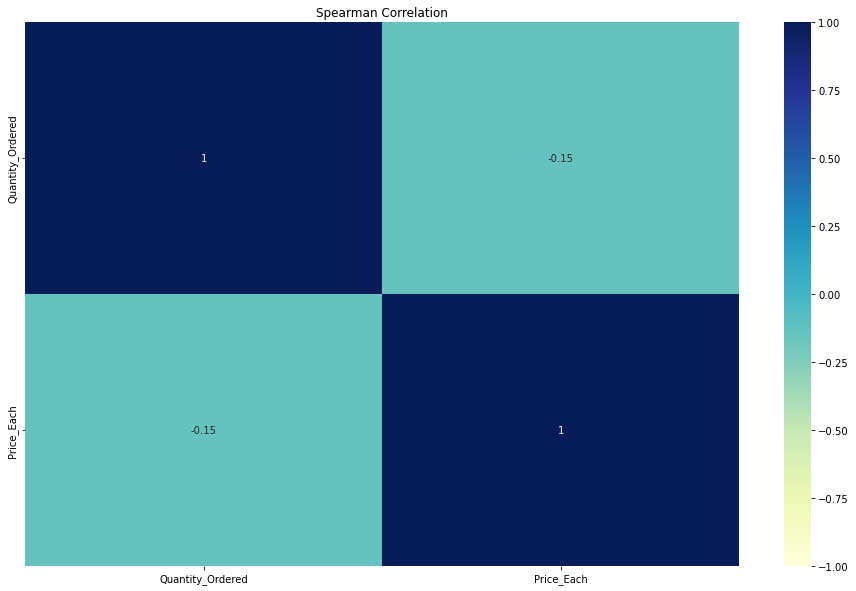

In [181]:
def display_correlation(df):
    r = data.corr(method="spearman")
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")
plt.title("Spearman Correlation")

## Conclusion 

* In the City San francisco max product purchased.
* san francisco is good city for opening new branch